In [77]:
import numpy as np
import seaborn as sns
sns.set(style='ticks', palette='Paired')
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import time
import random
import math
import pandas as pd
label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
from scipy.linalg import circulant
import networkx as nx
%matplotlib inline

## Function to create a discrete colormap

In [24]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

# MAIN TEXT FIGURES

**Important Note:**
Originally, gamma in the main text was referred to as alpha. Furthermore, this value was originally calculated such that increasing gamma/alpha decreased the openness or increased the 'closedness' of the system. This was ultimately reversed in the main text presentation.

## Main text - Figure 2

#### Load data

In [12]:
N_0_reg = np.load("Data/Regular/ave/N_ave_0.npy")
N_1_reg = np.load("Data/Regular/ave/N_ave_1.npy")
N_0_rand = np.load("Data/Random/ave/N_ave_0.npy")
N_1_rand = np.load("Data/Random/ave/N_ave_1.npy")

#### Create array for indexing V values

In [13]:
V_vals = np.linspace(0,0.2,30)

#### Generate figure

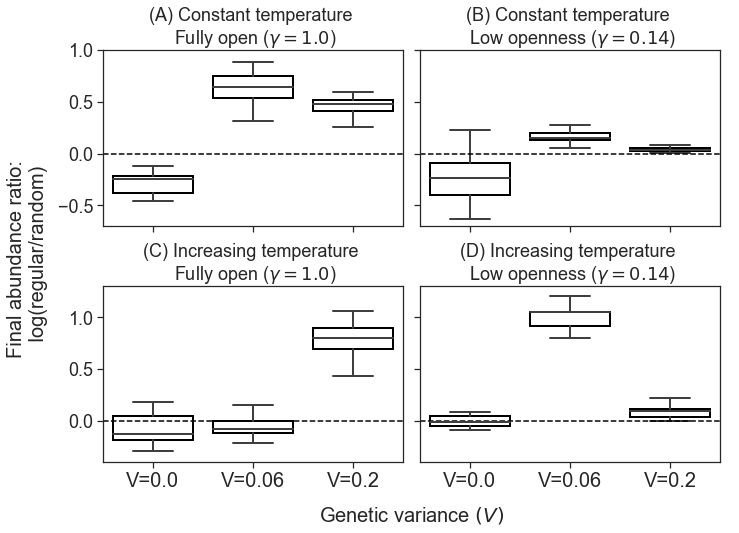

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(11,8))
ax_big = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
ax_big.set_ylabel('Final abundance ratio: \n log(regular/random)', fontsize=20, labelpad=20)
#ax_big.set_xlabel('Additive genetic variance: log(' + r'$V+1$)', fontsize=20, labelpad=15)
ax_big.set_xlabel('Genetic variance '+ r'$(V)$', fontsize=20, labelpad=15)
x_range = np.linspace(0,0.2,30)
ymin = -0.05
ymax = 1.2

alpha1 = 0
alpha2 = 25

V1=0
V2=9
V3=29

V_label1 = 'V=' + str(np.round(V_vals[V1], decimals=2))
V_label2 = 'V=' + str(np.round(V_vals[V2], decimals=2)) 
V_label3 = 'V=' + str(np.round(V_vals[V3], decimals=2)) 

FS = 18

alpha=alpha1
abundance = np.concatenate((np.log(N_0_reg[V1,alpha,:]/N_0_rand[V1,alpha,:]),
                            np.log(N_0_reg[V2,alpha,:]/N_0_rand[V2,alpha,:]),
                            np.log(N_0_reg[V3,alpha,:]/N_0_rand[V3,alpha,:])))
vals = np.concatenate((np.repeat(np.round(V_vals[V1],decimals=2),20),
                       np.repeat(np.round(V_vals[V2],decimals=2),20),
                       np.repeat(np.round(V_vals[V3],decimals=2),20)
                      ))
zipped = zip(abundance,vals)
df = pd.DataFrame(zipped, columns = ['Ratio', 'V']) 
sns.boxplot(x='V', y='Ratio', data=df, showfliers=False, linewidth=2., ax=ax[0,0])
ax[0,0].set(xlabel='', ylabel='')
ax[0,0].set_title('(A) Constant temperature \n Fully open (' + r'$\gamma = 1.0$)', fontsize=FS)
ax[0,0].set_xticklabels([],fontsize=20) 
ax[0,0].set_ylim([-.7,1])
ax[0,0].axhline(y=0, color='k', linestyle='--')

for i,artist in enumerate(ax[0,0].artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor('k')
    artist.set_facecolor('None')

###
alpha=alpha2
abundance = np.concatenate((np.log(N_0_reg[V1,alpha,:]/N_0_rand[V1,alpha,:]),
                            np.log(N_0_reg[V2,alpha,:]/N_0_rand[V2,alpha,:]),
                            np.log(N_0_reg[V3,alpha,:]/N_0_rand[V3,alpha,:])))
vals = np.concatenate((np.repeat(np.round(V_vals[V1],decimals=2),20),
                       np.repeat(np.round(V_vals[V2],decimals=2),20),
                       np.repeat(np.round(V_vals[V3],decimals=2),20)
                      ))
zipped = zip(abundance,vals)
df = pd.DataFrame(zipped, columns = ['Ratio', 'V']) 
sns.boxplot(x='V', y='Ratio', data=df, showfliers=False, linewidth=2., ax=ax[0,1])
ax[0,1].set(xlabel='', ylabel='')
ax[0,1].set_title('(B) Constant temperature \n Low openness (' + r'$\gamma = 0.14$)', fontsize=FS)
ax[0,1].set_xticklabels([],fontsize=20) 
ax[0,1].set_yticklabels([],fontsize=20) 
ax[0,1].set_ylim([-.7,1])
ax[0,1].axhline(y=0, color='k', linestyle='--')

for i,artist in enumerate(ax[0,1].artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor('k')
    artist.set_facecolor('None')


###
alpha=alpha1
abundance = np.concatenate((np.log(N_1_reg[V1,alpha,:]/N_1_rand[V1,alpha,:]),
                            np.log(N_1_reg[V2,alpha,:]/N_1_rand[V2,alpha,:]),
                            np.log(N_1_reg[V3,alpha,:]/N_1_rand[V3,alpha,:])))
vals = np.concatenate((np.repeat(np.round(V_vals[V1],decimals=2),20),
                       np.repeat(np.round(V_vals[V2],decimals=2),20),
                       np.repeat(np.round(V_vals[V3],decimals=2),20)
                      ))
zipped = zip(abundance,vals)
df = pd.DataFrame(zipped, columns = ['Ratio', 'V']) 
sns.boxplot(x='V', y='Ratio', data=df, showfliers=False, linewidth=2., ax=ax[1,0])
ax[1,0].set(xlabel='', ylabel='')
ax[1,0].set_title('(C) Increasing temperature \n Fully open (' + r'$\gamma = 1.0$)', fontsize=FS)
ax[1,0].set_xticklabels([V_label1,V_label2,V_label3],fontsize=20) 
ax[1,0].set_ylim([-.4,1.3])
ax[1,0].axhline(y=0, color='k', linestyle='--')

for i,artist in enumerate(ax[1,0].artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor('k')
    artist.set_facecolor('None')    
    
    
###
alpha=alpha2
abundance = np.concatenate((np.log(N_1_reg[V1,alpha,:]/N_1_rand[V1,alpha,:]),
                            np.log(N_1_reg[V2,alpha,:]/N_1_rand[V2,alpha,:]),
                            np.log(N_1_reg[V3,alpha,:]/N_1_rand[V3,alpha,:])))
vals = np.concatenate((np.repeat(np.round(V_vals[V1],decimals=2),20),
                       np.repeat(np.round(V_vals[V2],decimals=2),20),
                       np.repeat(np.round(V_vals[V3],decimals=2),20)
                      ))
zipped = zip(abundance,vals)
df = pd.DataFrame(zipped, columns = ['Ratio', 'V']) 
sns.boxplot(x='V', y='Ratio', data=df, showfliers=False, linewidth=2., ax=ax[1,1])
ax[1,1].set(xlabel='', ylabel='')
ax[1,1].set_title('(D) Increasing temperature \n Low openness (' + r'$\gamma = 0.14$)', fontsize=FS)
ax[1,1].set_xticklabels([V_label1,V_label2,V_label3],fontsize=20) 
ax[1,1].set_yticklabels([],fontsize=20) 
ax[1,1].set_ylim([-.4,1.3])
ax[1,1].axhline(y=0, color='k', linestyle='--')

for i,artist in enumerate(ax[1,1].artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor('k')
    artist.set_facecolor('None')   
    
plt.tight_layout()
plt.savefig("Figures/Fig2.png", dpi=600, bbox_inches='tight')

## Main text - Figure 3

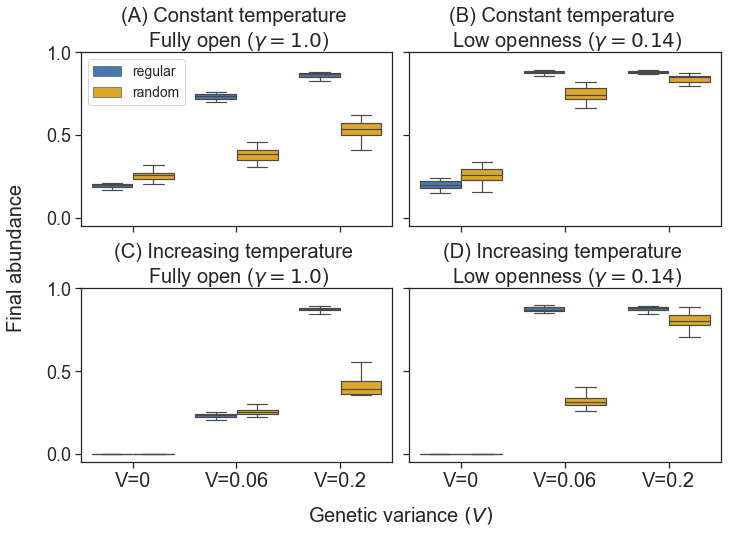

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(11,8))
ax_big = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
ax_big.set_ylabel('Final abundance', fontsize=20, labelpad=20)
ax_big.set_xlabel('Genetic variance '+ r'$(V)$', fontsize=20, labelpad=15)
x_range = np.linspace(0,0.2,30)
ymin = -0.05
ymax = 1.2

category =['regular']*20 + ['random']*20 + ['regular']*20 + ['random']*20 + ['regular']*20 + ['random']*20

alpha1 = 0
alpha2 = 25

V1=0
V2=9
V3=29

V_label1 = 'V=' + str(np.round(V_vals[V1], decimals=2))
V_label2 = 'V=' + str(np.round(V_vals[V2], decimals=2)) 
V_label3 = 'V=' + str(np.round(V_vals[V3], decimals=2)) 

FS = 18
###
alpha = alpha1
abundance = np.concatenate((N_0_reg[V1,alpha,:],N_0_rand[V1,alpha,:],
                            N_0_reg[V2,alpha,:],N_0_rand[V2,alpha,:],
                            N_0_reg[V3,alpha,:],N_0_rand[V3,alpha,:]))
vals = np.concatenate((np.repeat(np.round(V_vals[V1],decimals=2),40),
                       np.repeat(np.round(V_vals[V2],decimals=2),40),
                       np.repeat(np.round(V_vals[V3],decimals=2),40)))

zipped = zip(abundance,vals,category)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Variance', 'network']) 
colors = ["windows blue", "amber"]
mypal = sns.xkcd_palette(colors)
sns.boxplot(x='Variance', y='Abundance', hue='network',data=df, showfliers=False, 
                 palette=mypal, linewidth=1.2, ax=ax[0,0])
ax[0,0].set_title("(A) Constant temperature \n Fully open (" + r'$\gamma=1.0$)', fontsize=20)
ax[0,0].set(xlabel='', ylabel='')
ax[0,0].set_xticklabels([],fontsize=20)
ax[0,0].set_ylim([-0.05,1.0])
ax[0,0].legend(loc="upper left",fontsize=14)


###
alpha = alpha2
abundance = np.concatenate((N_0_reg[V1,alpha,:],N_0_rand[V1,alpha,:],
                            N_0_reg[V2,alpha,:],N_0_rand[V2,alpha,:],
                            N_0_reg[V3,alpha,:],N_0_rand[V3,alpha,:]))
vals = np.concatenate((np.repeat(np.round(V_vals[V1],decimals=2),40),
                       np.repeat(np.round(V_vals[V2],decimals=2),40),
                       np.repeat(np.round(V_vals[V3],decimals=2),40)))

zipped = zip(abundance,vals,category)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Variance', 'network']) 
colors = ["windows blue", "amber"]
mypal = sns.xkcd_palette(colors)
sns.boxplot(x='Variance', y='Abundance', hue='network', data=df, showfliers=False, 
                 palette=mypal, linewidth=1.2, ax=ax[0,1])
ax[0,1].set_title("(B) Constant temperature \n Low openness (" + r'$\gamma=0.14$)', fontsize=20)
ax[0,1].set(xlabel='', ylabel='')
ax[0,1].set_xticklabels([],fontsize=20)
ax[0,1].set_yticklabels([],fontsize=20)
ax[0,1].set_ylim([-0.05,1.0])
ax[0,1].legend(loc="best",fontsize=16)
ax[0,1].get_legend().remove()

###
alpha=alpha1
abundance = np.concatenate((N_1_reg[V1,alpha,:],N_1_rand[V1,alpha,:],
                            N_1_reg[V2,alpha,:],N_1_rand[V2,alpha,:],
                            N_1_reg[V3,alpha,:],N_1_rand[V3,alpha,:]))
vals = np.concatenate((np.repeat(np.round(V_vals[V1],decimals=2),40),
                       np.repeat(np.round(V_vals[V2],decimals=2),40),
                       np.repeat(np.round(V_vals[V3],decimals=2),40)))

zipped = zip(abundance,vals,category)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Variance', 'network']) 
colors = ["windows blue", "amber"]
mypal = sns.xkcd_palette(colors)
sns.boxplot(x='Variance', y='Abundance', hue='network',data=df, showfliers=False, 
                 palette=mypal, linewidth=1.2, ax=ax[1,0])
ax[1,0].set_title("(C) Increasing temperature \n Fully open (" + r'$\gamma=1.0$)', fontsize=20)
ax[1,0].set(xlabel='', ylabel='')
ax[1,0].set_xticklabels(['V=0','V=0.06','V=0.2'],fontsize=20)
ax[1,0].set_ylim([-0.05,1.0])
ax[1,0].get_legend().remove()
    
###
alpha=alpha2
abundance = np.concatenate((N_1_reg[V1,alpha,:],N_1_rand[V1,alpha,:],
                            N_1_reg[V2,alpha,:],N_1_rand[V2,alpha,:],
                            N_1_reg[V3,alpha,:],N_1_rand[V3,alpha,:]))
vals = np.concatenate((np.repeat(np.round(V_vals[V1],decimals=2),40),
                       np.repeat(np.round(V_vals[V2],decimals=2),40),
                       np.repeat(np.round(V_vals[V3],decimals=2),40)))

zipped = zip(abundance,vals,category)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Variance', 'network']) 
colors = ["windows blue", "amber"]
mypal = sns.xkcd_palette(colors)
sns.boxplot(x='Variance', y='Abundance', hue='network',data=df, showfliers=False, 
                 palette=mypal, linewidth=1.2, ax=ax[1,1])
ax[1,1].set_title("(D) Increasing temperature \n Low openness (" + r'$\gamma=0.14$)', fontsize=20)
ax[1,1].set(xlabel='', ylabel='')
ax[1,1].set_xticklabels(['V=0','V=0.06','V=0.2'],fontsize=20)
ax[1,1].set_yticklabels([],fontsize=20)
ax[1,1].set_ylim([-0.05,1.0])
ax[1,1].get_legend().remove()

plt.tight_layout()
plt.savefig("Figures/Fig3.png", dpi=600, bbox_inches='tight')

## Main text - Figure 4

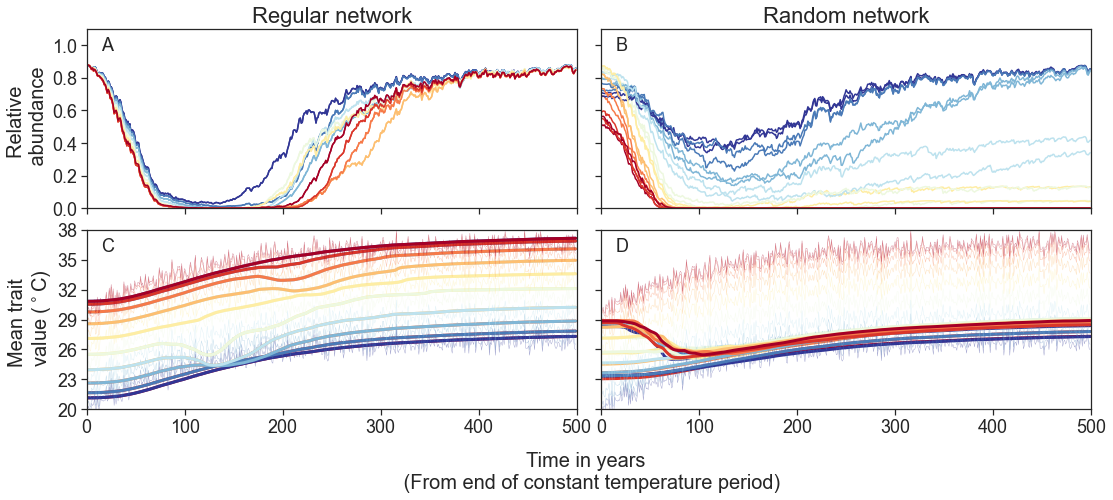

In [25]:
length = 30
alpha_vals = np.linspace(0,1.,length)
V_vals = np.linspace(0,0.2,length)

alpha = 25
V = 9
LW1 = 3.0
LW2 = 0.4

SST = np.load("Data/Regular/SST/SST_mat_self_rec_0.npy")
N = np.load("Data/Regular/time_series/N_reg_ave_ts_1.npy")
Z = np.load("Data/Regular/time_series/Z_reg_ave_ts_1.npy")

N_std = np.load("Data/Regular/time_series/N_reg_std_ts_1.npy")
Z_std = np.load("Data/Regular/time_series/N_reg_std_ts_1.npy")
alpha_val = 0.3

tol = 1e-3

cmap = discrete_cmap(10, base_cmap="RdYlBu")
color_idx = np.linspace(0, 1, 10)

fig, ax = plt.subplots(2,2, figsize=(18,7))
ax_big = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
ax_big.set_xlabel('Time in years \n (From end of constant temperature period)', fontsize=20, labelpad=15)

numSteps = 500

coral = 0
for i, idx in zip(np.arange(0,10), color_idx):
    ax[0,0].plot(N[i,coral,:,V,alpha], color=cmap(idx))
    
cmap = discrete_cmap(10, base_cmap="RdYlBu_r")
for i, idx in zip(np.arange(10,20), color_idx):
    ax[0,0].plot(N[i,coral,:,V,alpha], color=cmap(idx))

ax[0,0].set_xticklabels([])
    
for i, idx in zip(np.arange(0,10), color_idx):
    #ax[1,0].plot(SST[i,:,V,alpha], color=cmap(idx),alpha=0.3)
    ax[1,0].plot(Z[i,coral,:,V,alpha], color=cmap(idx), linewidth=LW1)

cmap = discrete_cmap(10, base_cmap="RdYlBu_r")
for i, idx in zip(np.arange(10,20), color_idx):
    ax[1,0].plot(SST[i,:,V,alpha], color=cmap(idx), linewidth = LW2, alpha=0.5)
    ax[1,0].plot(Z[i,coral,:,V,alpha], color=cmap(idx), linewidth=LW1)
    
N = np.load("Data/Random/time_series/N_rand_ave_ts_1.npy")
Z = np.load("Data/Random/time_series/Z_rand_ave_ts_1.npy")

N_std = np.load("Data/Random/time_series/N_rand_std_ts_1.npy")
Z_std = np.load("Data/Random/time_series/N_rand_std_ts_1.npy")
alpha_val = 0.3

tol = 1e-3

cmap = discrete_cmap(10, base_cmap="RdYlBu")
color_idx = np.linspace(0, 1, 10)

numSteps = 500

coral = 0
for i, idx in zip(np.arange(0,10), color_idx):
    ax[0,1].plot(N[i,coral,:,V,alpha], color=cmap(idx))

cmap = discrete_cmap(10, base_cmap="RdYlBu_r")
for i, idx in zip(np.arange(10,20), color_idx):
    ax[0,1].plot(N[i,coral,:,V,alpha], color=cmap(idx))

ax[0,1].set_yticklabels([])
ax[0,1].set_xticklabels([])
ax[1,1].set_yticklabels([])
ax[0,0].set_ylabel('Relative \n abundance', fontsize=20)
ax[1,0].set_ylabel('Mean trait \n value ($^\circ$C)', fontsize=20)
ax[0,0].set_title('Regular network', fontsize=22)
ax[0,1].set_title('Random network', fontsize=22)
    
for i, idx in zip(np.arange(0,10), color_idx):
    ax[1,1].plot(Z[i,coral,:,V,alpha], color=cmap(idx), linewidth=LW1)

cmap = discrete_cmap(10, base_cmap="RdYlBu_r")
for i, idx in zip(np.arange(10,20), color_idx):
    ax[1,1].plot(SST[i,:,V,alpha], color=cmap(idx), linewidth = LW2, alpha=0.5)
    ax[1,1].plot(Z[i,coral,:,V,alpha], color=cmap(idx), linewidth=LW1)

        
ax[0,0].set_ylim([0,1.1])
ax[0,1].set_ylim([0,1.1])

ax[0,0].set_yticks(np.linspace(0,1,6))
#ax[0,0].set_yticklabels(['21.0','23.0','25.0','27.0','29.0','31.0','33.0'])
ax[0,1].set_yticks(np.linspace(0,1,6))

ax[0,0].set_xlim([0,500])
ax[0,1].set_xlim([0,500])

ax[1,0].set_ylim([20,38])
ax[1,1].set_ylim([20,38])

ax[1,0].set_yticks(np.linspace(20,38,7))
#ax[1,0].set_yticklabels(['23.0','25.0','27.0','29.0','31.0','33.0','35.0'])

ax[1,1].set_yticks(np.linspace(20,38,7))
#ax[1,1].set_yticklabels([])

ax[1,0].set_xlim([0,500])
ax[1,1].set_xlim([0,500])

ax[0,0].annotate("A", xy=(0.03, 0.88), fontsize=18, xycoords="axes fraction")
ax[0,1].annotate("B", xy=(0.03, 0.88), fontsize=18, xycoords="axes fraction")
ax[1,0].annotate("C", xy=(0.03, 0.88), fontsize=18, xycoords="axes fraction")
ax[1,1].annotate("D", xy=(0.03, 0.88), fontsize=18, xycoords="axes fraction")

plt.subplots_adjust(wspace=0.05, hspace=0.12)
plt.savefig("Figures/Fig4.png", dpi=600, bbox_inches='tight')

## Main text - Figure 5A

#### Functions to generate random networks

In [153]:
def _distance_matrix(L):
    Dmax = L//2
 
    D  = list(range(Dmax+1))
    D += D[-2+(L%2):0:-1]
 
    return circulant(D)/Dmax
    
def _pd(d, p0, beta):
    return beta*p0 + (d <= p0)*(1-beta)
    
def watts_strogatz(L, p0, beta, directed=False, rngseed=1):
    rng = np.random.RandomState(rngseed)
 
    d = _distance_matrix(L)
    p = _pd(d, p0, beta)
 
    if directed:
        A = 1*(rng.random_sample(p.shape) < p)
        np.fill_diagonal(A, 0)
    else:
        upper = np.triu_indices(L, 1)
 
        A          = np.zeros_like(p, dtype=int)
        A[upper]   = 1*(rng.rand(len(upper[0])) < p[upper])
        A.T[upper] = A[upper]
 
    return A

def preserve_self_loops(matrix0, edges):
    # matrix0 needs to have 1's in the diagonal for this to work
    matrix1=matrix0
    for i in np.arange(0,matrix0.shape[0]):
        deg_dist = np.count_nonzero(matrix0[i,:])
        if deg_dist > edges:
            for k in np.arange(0,deg_dist-edges):
                non_zeros = (np.where(matrix0[i,:]>0)[0]).tolist()
                non_zeros.remove(i)
                random_index = non_zeros[np.random.randint(0,len(non_zeros))]
                matrix1[i,random_index] = 0
    return matrix1

def D_norm(D0):
    size = D0.shape[0]
    D1  = np.zeros((size,size)) # Preallocate matrix
    for i in np.arange(size):
        D1[:,i]  = (D0[:,i] / D0[:,i].sum()).T
    return D1

def gen_rand_matrix(seed):    
    # Network size = 20
    #! Note: directed = False produces a symmetric matrix
    random.seed(seed)

    L = 20
    K = 4
    p0 = K/(L-1)
    regular = watts_strogatz(beta=0,directed=False,L=L,p0=p0)

    G = nx.Graph()
    G.add_nodes_from(np.arange(0,20))

    for i in np.arange(0,20):
        for j in np.arange(0,20):
            if regular[i,j] == 1:
                G.add_edge(i,j)
            
    reg_G = nx.to_numpy_matrix(G)
    di = np.diag_indices(20)

    random_G = nx.double_edge_swap(nx.from_numpy_matrix(reg_G), nswap=20, max_tries=1000)
    random_G2 = nx.to_numpy_matrix(random_G)

    di = np.diag_indices(20)
    random_G2[di]=1

    random_G2_revised = np.asarray(preserve_self_loops(random_G2,edges=5))
    
    random_G2_norm = D_norm(random_G2_revised)
    
    return random_G2_norm
    
#! Function that modifies a connectivity matrix to "bias" the diagonal
#! Here, higher gamma = lower openness; this is reversed in the manuscript
def bias_diagonal(A, gamma):
    I = np.identity(A.shape[0])
    A_bias = (1-gamma)*A + gamma*I
    return A_bias

#### Generate openness values

In [138]:
gamma_vals = np.linspace(0.,1.,30)

#### Load the regular connectivity/dispersal matrix

In [139]:
D_reg = np.load("Data/Regular/D_reg.npy")
SST = np.load("Data/Regular/SST/SST_mat_self_rec0_0.npy")
traits = SST[:,0,0,0]

### Mean trait mismatch vs. openness 

#### Regular network

In [154]:
N = np.load("Data/Regular/time_series/N_reg_ave_ts_0.npy")
N_ts = N[:,0,:,0,0]
mean_reg = []

for gamma in gamma_vals:
    k= []
    D = bias_diagonal(D_reg,gamma)
    D0 = D[:]

    for i in np.arange(0,20):
        ID = np.where(D0[i,:]>0)
        scale = N_ts[ID,0]/np.max(N_ts[ID,0])
        val = np.abs(traits[i]-traits[ID])*D0[i,ID]/D0.max() * scale / 4
        k.append(val)

    k1 = np.asarray(k)

    mean_reg.append(np.mean(k1))

#### Random network

In [155]:
N = np.load("Data/Random/time_series/N_rand_ave_ts_0.npy")
N_ts = N[:,0,:,0,0]
mean_rand_overall = []

for gamma in gamma_vals:
    mean_rand = []
    for m in np.arange(0,100):    
        k = []
        D = bias_diagonal(gen_rand_matrix(m),gamma)
        D0 = D[:]

        for i in np.arange(0,20):
            ID = np.where(D0[i,:]>0)
            val = np.abs(traits[i]-traits[ID])*D0[i,ID]/D0.max()/4
            k.append(val)

        k1 = np.asarray(k)
        mean_rand.append(np.mean(k1))
    mean_rand_overall.append(np.mean(mean_rand))

#### We need to reverse these data because our original definition of gamma was that higher values were more closed/less open. This is reversed in the manuscript.

In [156]:
mean_reg_rev = np.zeros(30)
for j in np.arange(0,30):
    mean_reg_rev[j] = mean_reg[29-j]
    
mean_rand_rev = np.zeros(30)
for j in np.arange(0,30):
    mean_rand_rev[j] = mean_rand_overall[29-j]

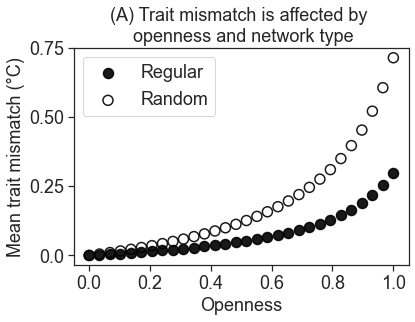

In [157]:
t = u"\u00b0"
plt.scatter(gamma_vals, mean_reg_rev, color="k", alpha=0.9, s=100, edgecolors='black', linewidths=1.5)
plt.scatter(gamma_vals, mean_rand_rev, color='None', alpha=0.9, s=100, edgecolors='black', linewidths=1.5)
plt.legend(["Regular","Random"], fontsize=18)
plt.ylabel("Mean trait mismatch (" + t + "C)", fontsize=18)
plt.xlabel("Openness", fontsize=18)
plt.yticks([0.,0.25,0.5,0.75], ['0.0','0.25','0.50','0.75'])
plt.title('(A) Trait mismatch is affected by \n openness and network type', fontsize=18)
plt.savefig("Figures/Fig5A.png", dpi=600, bbox_inches='tight')

### Main text - Figure 5B

In [146]:
Z0_reg = np.load("Data/Regular/time_series/Z_reg_ave_ts_0.npy")
Z1_reg = np.load("Data/Regular/time_series/Z_reg_ave_ts_1.npy")
Z0_rand = np.load("Data/Random/time_series/Z_rand_ave_ts_0.npy")
Z1_rand = np.load("Data/Random/time_series/Z_rand_ave_ts_1.npy")

In [147]:
traitdev_V0_rand = Z1_rand[:,0,-1,0,:].std(axis=0)
traitdev_V03_rand = Z1_rand[:,0,-1,3,:].std(axis=0)
traitdev_V05_rand = Z1_rand[:,0,-1,5,:].std(axis=0)
traitdev_V07_rand = Z1_rand[:,0,-1,7,:].std(axis=0)
traitdev_V10_rand = Z1_rand[:,0,-1,10,:].std(axis=0)
traitdev_V15_rand = Z1_rand[:,0,-1,15,:].std(axis=0)
traitdev_V30_rand = Z1_rand[:,0,-1,29,:].std(axis=0)

traitdev_V0_reg = Z1_reg[:,0,-1,0,:].std(axis=0)
traitdev_V03_reg = Z1_reg[:,0,-1,3,:].std(axis=0)
traitdev_V05_reg = Z1_reg[:,0,-1,5,:].std(axis=0)
traitdev_V07_reg = Z1_reg[:,0,-1,7,:].std(axis=0)
traitdev_V10_reg = Z1_reg[:,0,-1,10,:].std(axis=0)
traitdev_V15_reg = Z1_reg[:,0,-1,15,:].std(axis=0)
traitdev_V30_reg = Z1_reg[:,0,-1,29,:].std(axis=0)

In [150]:
D_reg = np.load("Data/Regular/D_reg.npy")
N = np.load("Data/Regular/time_series/N_reg_ave_ts_0.npy")
N_ts = N[:,0,:,0,0]
mean_reg_overall = []

for alpha in alpha_vals:
    mean_reg = []
    for m in np.arange(0,100):    
        k = []
        D = bias_diagonal(D_reg,alpha)
        D0 = D[:]

        for i in np.arange(0,20):
            ID = np.where(D0[i,:]>0)
            val = np.abs(traits[i]-traits[ID])*D0[i,ID]/D0.max()/4
            k.append(val)

        k1 = np.asarray(k)
        mean_reg.append(np.mean(k1))
    mean_reg_overall.append(np.mean(mean_reg))

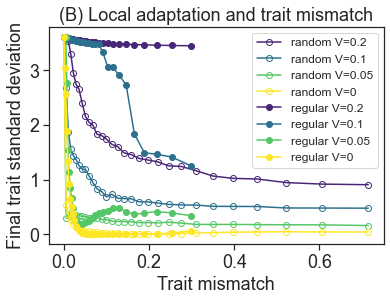

In [152]:
plt.plot(mean_rand_overall,traitdev_V30_rand, marker='o',  markerfacecolor='none', color='#482677ff')
plt.plot(mean_rand_overall,traitdev_V15_rand, marker='o',  markerfacecolor='none', color='#2d708eff')
plt.plot(mean_rand_overall,traitdev_V07_rand, marker='o', markerfacecolor='none', color='#55c667ff')
plt.plot(mean_rand_overall,traitdev_V0_rand, marker='o', markerfacecolor='none', color='#fde725ff')

plt.plot(mean_reg_overall,traitdev_V30_reg, marker='o', color='#482677ff')
plt.plot(mean_reg_overall,traitdev_V15_reg, marker='o', color='#2d708eff' )
plt.plot(mean_reg_overall,traitdev_V07_reg, marker='o', color='#55c667ff' )
plt.plot(mean_reg_overall,traitdev_V0_reg, marker='o', color='#fde725ff' )


plt.xlabel('Trait mismatch', fontsize=18)
plt.ylabel('Final trait standard deviation', fontsize=18)
plt.legend(['random V=0.2', 'random V=0.1', 'random V=0.05','random V=0',
            'regular V=0.2', 'regular V=0.1', 'regular V=0.05','regular V=0'], fontsize=12)


plt.title("(B) Local adaptation and trait mismatch", fontsize=18)
plt.savefig("Figures/Fig5B.png", dpi=600, bbox_inches='tight')

### Main text - Figure 5C

In [161]:
abundance_V0_rand = N_1_rand[0,:,:].mean(axis=1)
abundance_V10_rand = N_1_rand[10,:,:].mean(axis=1)
abundance_V15_rand = N_1_rand[15,:,:].mean(axis=1)
abundance_V30_rand = N_1_rand[29,:,:].mean(axis=1)

abundance_V0_reg = N_1_reg[0,:,:].mean(axis=1)
abundance_V10_reg = N_1_reg[10,:,:].mean(axis=1)
abundance_V15_reg = N_1_reg[15,:,:].mean(axis=1)
abundance_V30_reg = N_1_reg[29,:,:].mean(axis=1)

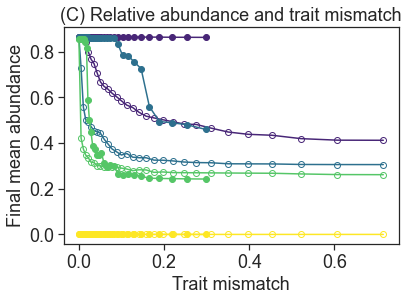

In [162]:
plt.plot(mean_rand_overall,abundance_V30_rand, marker='o', color='#482677ff', markerfacecolor='none')
plt.plot(mean_rand_overall,abundance_V15_rand, marker='o', color='#2d708eff' , markerfacecolor='none')
plt.plot(mean_rand_overall,abundance_V10_rand, marker='o', color='#55c667ff', markerfacecolor='none')
plt.plot(mean_rand_overall,abundance_V0_rand, marker='o', color='#fde725ff', markerfacecolor='none')

plt.plot(mean_reg_overall,abundance_V30_reg, marker='o', color='#482677ff')
plt.plot(mean_reg_overall,abundance_V15_reg, marker='o', color='#2d708eff')
plt.plot(mean_reg_overall,abundance_V10_reg, marker='o', color='#55c667ff')
plt.plot(mean_reg_overall,abundance_V0_reg, marker='o', color='#fde725ff')


plt.xlabel('Trait mismatch', fontsize=18)
plt.ylabel('Final mean abundance', fontsize=18)
plt.title('(C) Relative abundance and trait mismatch', fontsize=18)
plt.savefig("Figures/Fig5c.png", dpi=600, bbox_inches='tight')

# SUPPORTING INFORMATION FIGURES

### SI - Figure S1

Figures A-F were values at the end of the constant temperature period while G-L were values at the end of the increasing temperature period.

#### Load the required data. 
In these simulations, the range of the temperature gradient, also known as the 'steepness' was varied. The runs from the main text had a temperature range of 10 degrees C. We also simualted a range of 0 deg C (a homogenous network), 5 deg C and 20 deg C.

In [164]:
N0_0_reg = np.load("Data/Steepness/steepness_0/ave/regular/N_ave_0.npy")
N5_0_reg = np.load("Data/Steepness/steepness_5/ave/regular/N_ave_0.npy")
N10_0_reg = np.load("Data/Regular/ave/N_ave_0.npy")
N20_0_reg = np.load("Data/Steepness/steepness_20/ave/regular/N_ave_0.npy")

N0_1_reg = np.load("Data/Steepness/steepness_0/ave/regular/N_ave_1.npy")
N5_1_reg = np.load("Data/Steepness/steepness_5/ave/regular/N_ave_1.npy")
N10_1_reg = np.load("Data/Regular/ave/N_ave_1.npy")
N20_1_reg = np.load("Data/Steepness/steepness_20/ave/regular/N_ave_1.npy")

N0_0_rand = np.load("Data/Steepness/steepness_0/ave/random/N_ave_0.npy")
N5_0_rand = np.load("Data/Steepness/steepness_5/ave/random/N_ave_0.npy")
N10_0_rand = np.load("Data/Random/ave/N_ave_0.npy")
N20_0_rand = np.load("Data/Steepness/steepness_20/ave/random/N_ave_0.npy")

N0_1_rand = np.load("Data/Steepness/steepness_0/ave/random/N_ave_1.npy")
N5_1_rand = np.load("Data/Steepness/steepness_5/ave/random/N_ave_1.npy")
N10_1_rand = np.load("Data/Random/ave/N_ave_1.npy")
N20_1_rand = np.load("Data/Steepness/steepness_20/ave/random/N_ave_1.npy")

In [165]:
category_steep =['0.0']*20 + ['05.0']*20 + ['10.0']*20 + ['20.0']*20 + ['0.0']*20 + ['05.0']*20 + ['10.0']*20 + ['20.0']*20

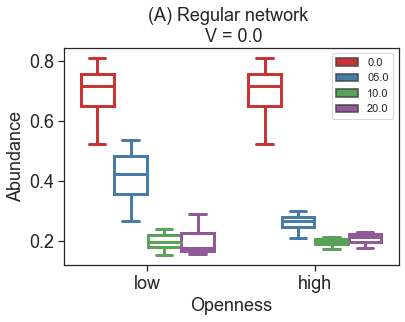

In [173]:
V = 0
alpha1 = 25
alpha2 = 0
abundance = np.concatenate((N0_0_reg[V,alpha1,:],N5_0_reg[V,alpha1,:],N10_0_reg[V,alpha1,:],N20_0_reg[V,alpha1,:],
                            N0_0_reg[V,alpha2,:],N5_0_reg[V,alpha2,:],N10_0_reg[V,alpha2,:],N20_0_reg[V,alpha2,:]))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),80),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),80)))


zipped = zip(abundance,vals,category_steep)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'steepness']) 

fig,(ax1) = plt.subplots(1)
sns.boxplot(x='Openness', y='Abundance', hue='steepness',data=df, showfliers=False, palette="Set1",
            linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')


    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(A) Regular network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)
#ax.set_ylim([0.,0.35])

ax1.legend(loc="best",fontsize=14)

# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

ax1.legend()

plt.savefig("Figures/FigS1a.png", dpi=600, bbox_inches='tight')

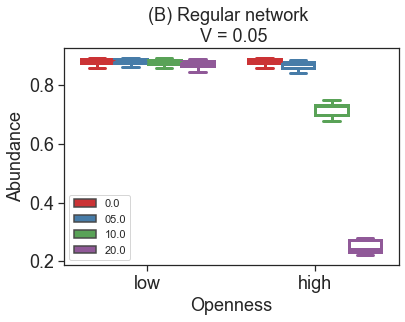

In [174]:
V = 7
alpha1 = 25
alpha2 = 0
abundance = np.concatenate((N0_0_reg[V,alpha1,:],N5_0_reg[V,alpha1,:],N10_0_reg[V,alpha1,:],N20_0_reg[V,alpha1,:],
                            N0_0_reg[V,alpha2,:],N5_0_reg[V,alpha2,:],N10_0_reg[V,alpha2,:],N20_0_reg[V,alpha2,:]))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),80),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),80)))


zipped = zip(abundance,vals,category_steep)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'steepness']) 

fig,(ax1) = plt.subplots(1)
sns.boxplot(x='Openness', y='Abundance', hue='steepness',data=df, showfliers=False, palette="Set1",
            linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')


    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(B) Regular network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)
#ax.set_ylim([0.,0.35])

ax1.legend(loc="best",fontsize=14)

# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

ax1.legend()

plt.savefig("Figures/FigS1b.png", dpi=600, bbox_inches='tight')

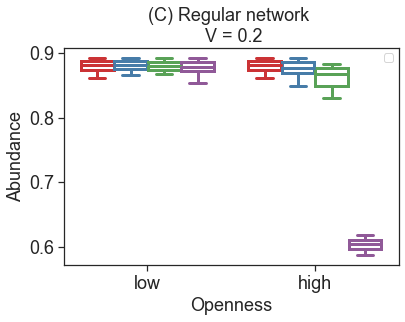

In [175]:
V = 29
alpha1 = 25
alpha2 = 0
abundance = np.concatenate((N0_0_reg[V,alpha1,:],N5_0_reg[V,alpha1,:],N10_0_reg[V,alpha1,:],N20_0_reg[V,alpha1,:],
                            N0_0_reg[V,alpha2,:],N5_0_reg[V,alpha2,:],N10_0_reg[V,alpha2,:],N20_0_reg[V,alpha2,:]))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),80),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),80)))


zipped = zip(abundance,vals,category_steep)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'steepness']) 

fig,(ax1) = plt.subplots(1)
sns.boxplot(x='Openness', y='Abundance', hue='steepness',data=df, showfliers=False, palette="Set1",
            linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')


    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(C) Regular network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)
#ax.set_ylim([0.,0.35])

ax1.legend(loc="best",fontsize=14)

# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

ax1.legend([])

plt.savefig("Figures/FigS1c.png", dpi=600, bbox_inches='tight')

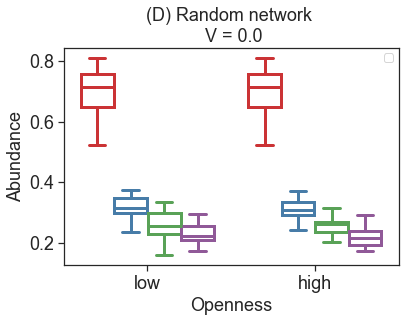

In [177]:
V = 0
alpha1 = 25
alpha2 = 0
abundance = np.concatenate((N0_0_rand[V,alpha1,:],N5_0_rand[V,alpha1,:],N10_0_rand[V,alpha1,:],N20_0_rand[V,alpha1,:],
                            N0_0_rand[V,alpha2,:],N5_0_rand[V,alpha2,:],N10_0_rand[V,alpha2,:],N20_0_rand[V,alpha2,:]))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),80),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),80)))


zipped = zip(abundance,vals,category_steep)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'steepness']) 

fig,(ax1) = plt.subplots(1)
sns.boxplot(x='Openness', y='Abundance', hue='steepness',data=df, showfliers=False, palette="Set1",
            linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')


    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(D) Random network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)
#ax.set_ylim([0.,0.35])

ax1.legend(loc="best",fontsize=14)

# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

ax1.legend([])
plt.savefig("Figures/FigS1d.png", dpi=600, bbox_inches='tight')

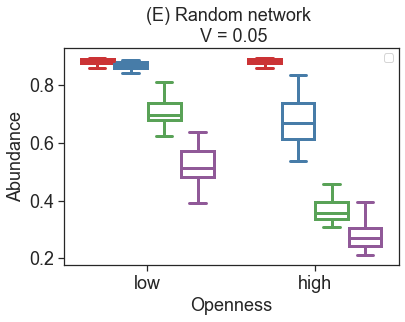

In [178]:
V = 7
alpha1 = 25
alpha2 = 0
abundance = np.concatenate((N0_0_rand[V,alpha1,:],N5_0_rand[V,alpha1,:],N10_0_rand[V,alpha1,:],N20_0_rand[V,alpha1,:],
                            N0_0_rand[V,alpha2,:],N5_0_rand[V,alpha2,:],N10_0_rand[V,alpha2,:],N20_0_rand[V,alpha2,:]))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),80),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),80)))


zipped = zip(abundance,vals,category_steep)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'steepness']) 

fig,(ax1) = plt.subplots(1)
sns.boxplot(x='Openness', y='Abundance', hue='steepness',data=df, showfliers=False, palette="Set1",
            linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')


    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(E) Random network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)
#ax.set_ylim([0.,0.35])

ax1.legend(loc="best",fontsize=14)

# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

ax1.legend([])
plt.savefig("Figures/FigS1e.png", dpi=600, bbox_inches='tight')

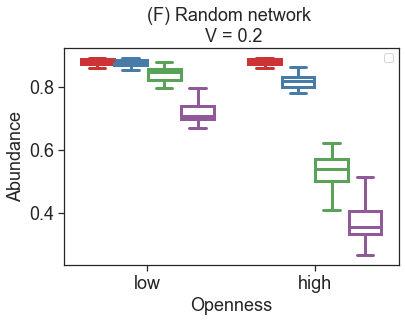

In [179]:
V = 29
alpha1 = 25
alpha2 = 0
abundance = np.concatenate((N0_0_rand[V,alpha1,:],N5_0_rand[V,alpha1,:],N10_0_rand[V,alpha1,:],N20_0_rand[V,alpha1,:],
                            N0_0_rand[V,alpha2,:],N5_0_rand[V,alpha2,:],N10_0_rand[V,alpha2,:],N20_0_rand[V,alpha2,:]))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),80),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),80)))


zipped = zip(abundance,vals,category_steep)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'steepness']) 

fig,(ax1) = plt.subplots(1)
sns.boxplot(x='Openness', y='Abundance', hue='steepness',data=df, showfliers=False, palette="Set1",
            linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')


    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(F) Random network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)
#ax.set_ylim([0.,0.35])

ax1.legend(loc="best",fontsize=14)

# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

ax1.legend([])
plt.savefig("Figures/FigS1f.png", dpi=600, bbox_inches='tight')

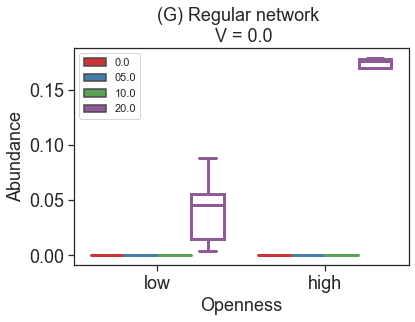

In [183]:
V = 0
alpha1 = 25
alpha2 = 0
abundance = np.concatenate((N0_1_reg[V,alpha1,:],N5_1_reg[V,alpha1,:],N10_1_reg[V,alpha1,:],N20_1_reg[V,alpha1,:],
                            N0_1_reg[V,alpha2,:],N5_1_reg[V,alpha2,:],N10_1_reg[V,alpha2,:],N20_1_reg[V,alpha2,:]))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),80),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),80)))


zipped = zip(abundance,vals,category_steep)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'steepness']) 

fig,(ax1) = plt.subplots(1)
sns.boxplot(x='Openness', y='Abundance', hue='steepness',data=df, showfliers=False, palette="Set1",
            linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')


    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(G) Regular network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)
#ax.set_ylim([0.,0.35])

ax1.legend(loc="best",fontsize=14)

# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

ax1.legend()
plt.savefig("Figures/FigS1g.png", dpi=600, bbox_inches='tight')

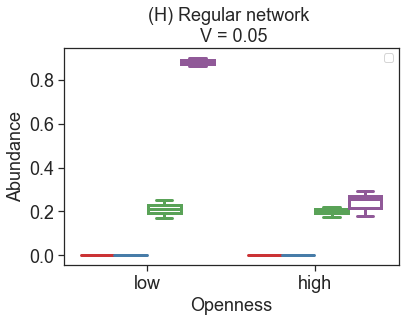

In [181]:
V = 7
alpha1 = 25
alpha2 = 0
abundance = np.concatenate((N0_1_reg[V,alpha1,:],N5_1_reg[V,alpha1,:],N10_1_reg[V,alpha1,:],N20_1_reg[V,alpha1,:],
                            N0_1_reg[V,alpha2,:],N5_1_reg[V,alpha2,:],N10_1_reg[V,alpha2,:],N20_1_reg[V,alpha2,:]))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),80),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),80)))


zipped = zip(abundance,vals,category_steep)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'steepness']) 

fig,(ax1) = plt.subplots(1)
sns.boxplot(x='Openness', y='Abundance', hue='steepness',data=df, showfliers=False, palette="Set1",
            linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')


    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(H) Regular network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)
#ax.set_ylim([0.,0.35])

ax1.legend(loc="best",fontsize=14)

# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

ax1.legend([])
plt.savefig("Figures/FigS1h.png", dpi=600, bbox_inches='tight')

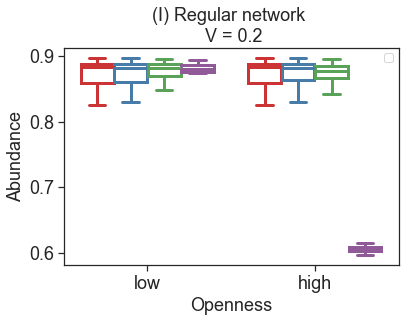

In [182]:
V = 29
alpha1 = 25
alpha2 = 0
abundance = np.concatenate((N0_1_reg[V,alpha1,:],N5_1_reg[V,alpha1,:],N10_1_reg[V,alpha1,:],N20_1_reg[V,alpha1,:],
                            N0_1_reg[V,alpha2,:],N5_1_reg[V,alpha2,:],N10_1_reg[V,alpha2,:],N20_1_reg[V,alpha2,:]))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),80),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),80)))


zipped = zip(abundance,vals,category_steep)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'steepness']) 

fig,(ax1) = plt.subplots(1)
sns.boxplot(x='Openness', y='Abundance', hue='steepness',data=df, showfliers=False, palette="Set1",
            linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')


    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(I) Regular network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)
#ax.set_ylim([0.,0.35])

ax1.legend(loc="best",fontsize=14)

# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

ax1.legend([])
plt.savefig("Figures/FigS1i.png", dpi=600, bbox_inches='tight')

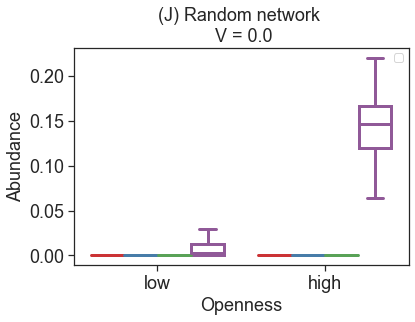

In [184]:
V = 0
alpha1 = 25
alpha2 = 0
abundance = np.concatenate((N0_1_rand[V,alpha1,:],N5_1_rand[V,alpha1,:],N10_1_rand[V,alpha1,:],N20_1_rand[V,alpha1,:],
                            N0_1_rand[V,alpha2,:],N5_1_rand[V,alpha2,:],N10_1_rand[V,alpha2,:],N20_1_rand[V,alpha2,:]))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),80),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),80)))


zipped = zip(abundance,vals,category_steep)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'steepness']) 

fig,(ax1) = plt.subplots(1)
sns.boxplot(x='Openness', y='Abundance', hue='steepness',data=df, showfliers=False, palette="Set1",
            linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')


    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(J) Random network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)
#ax.set_ylim([0.,0.35])

ax1.legend(loc="best",fontsize=14)

# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

ax1.legend([])
plt.savefig("Figures/FigS1j.png", dpi=600, bbox_inches='tight')

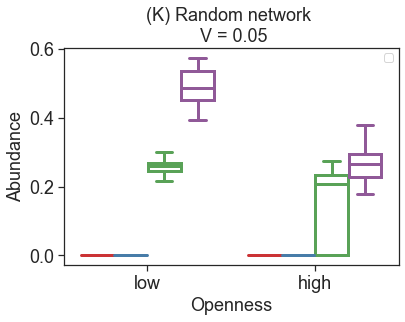

In [186]:
V = 7
alpha1 = 25
alpha2 = 0
abundance = np.concatenate((N0_1_rand[V,alpha1,:],N5_1_rand[V,alpha1,:],N10_1_rand[V,alpha1,:],N20_1_rand[V,alpha1,:],
                            N0_1_rand[V,alpha2,:],N5_1_rand[V,alpha2,:],N10_1_rand[V,alpha2,:],N20_1_rand[V,alpha2,:]))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),80),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),80)))


zipped = zip(abundance,vals,category_steep)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'steepness']) 

fig,(ax1) = plt.subplots(1)
sns.boxplot(x='Openness', y='Abundance', hue='steepness',data=df, showfliers=False, palette="Set1",
            linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')


    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(K) Random network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)
#ax.set_ylim([0.,0.35])

ax1.legend(loc="best",fontsize=14)

# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

ax1.legend([])
plt.savefig("Figures/FigS1k.png", dpi=600, bbox_inches='tight')

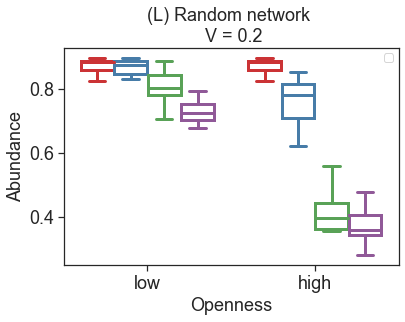

In [187]:
V = 29
alpha1 = 25
alpha2 = 0
abundance = np.concatenate((N0_1_rand[V,alpha1,:],N5_1_rand[V,alpha1,:],N10_1_rand[V,alpha1,:],N20_1_rand[V,alpha1,:],
                            N0_1_rand[V,alpha2,:],N5_1_rand[V,alpha2,:],N10_1_rand[V,alpha2,:],N20_1_rand[V,alpha2,:]))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),80),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),80)))


zipped = zip(abundance,vals,category_steep)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'steepness']) 

fig,(ax1) = plt.subplots(1)
sns.boxplot(x='Openness', y='Abundance', hue='steepness',data=df, showfliers=False, palette="Set1",
            linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')


    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(L) Random network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)
#ax.set_ylim([0.,0.35])

ax1.legend(loc="best",fontsize=14)

# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

ax1.legend([])
plt.savefig("Figures/FigS1l.png", dpi=600, bbox_inches='tight')

### SI - Figure S2

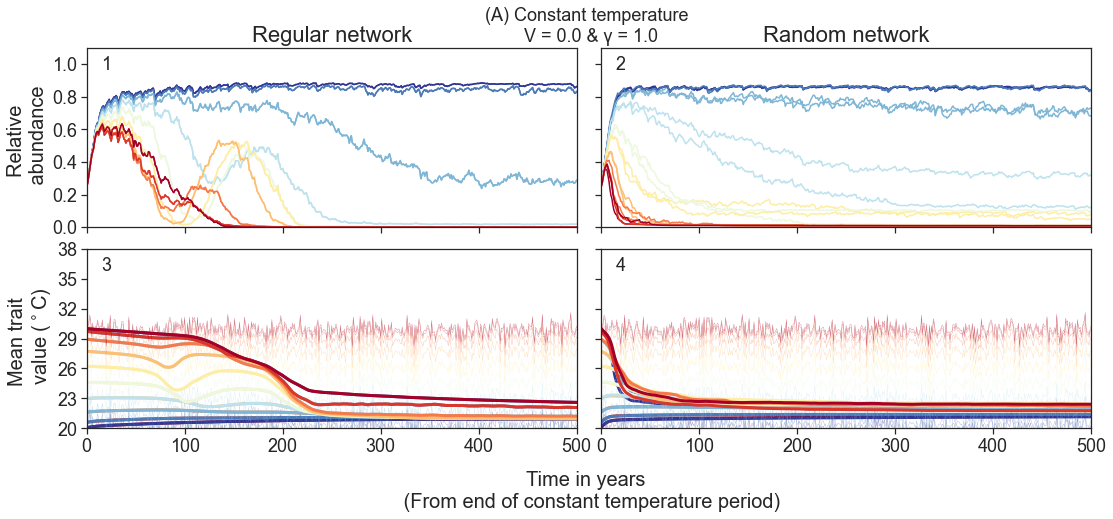

In [213]:
gamma = u"\u03B3"

length = 30
alpha_vals = np.linspace(0,1.,length)
V_vals = np.linspace(0,0.2,length)

alpha = 0
V = 0
LW1 = 3.0
LW2 = 0.4

SST = np.load("Data/Regular/SST/SST_mat_self_rec0_0.npy")
N = np.load("Data/Regular/time_series/N_reg_ave_ts_0.npy")
Z = np.load("Data/Regular/time_series/Z_reg_ave_ts_0.npy")

N_std = np.load("Data/Regular/time_series/N_reg_std_ts_0.npy")
Z_std = np.load("Data/Regular/time_series/N_reg_std_ts_0.npy")
alpha_val = 0.3

tol = 1e-3

cmap = discrete_cmap(10, base_cmap="RdYlBu")
color_idx = np.linspace(0, 1, 10)

fig, ax = plt.subplots(2,2, figsize=(18,7))
ax_big = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
ax_big.set_xlabel('Time in years \n (From end of constant temperature period)', fontsize=20, labelpad=15)

numSteps = 500

coral = 0
for i, idx in zip(np.arange(0,10), color_idx):
    ax[0,0].plot(N[i,coral,:,V,alpha], color=cmap(idx))
    
cmap = discrete_cmap(10, base_cmap="RdYlBu_r")
for i, idx in zip(np.arange(10,20), color_idx):
    ax[0,0].plot(N[i,coral,:,V,alpha], color=cmap(idx))

ax[0,0].set_xticklabels([])
    
for i, idx in zip(np.arange(0,10), color_idx):
    ax[1,0].plot(Z[i,coral,:,V,alpha], color=cmap(idx), linewidth=LW1)

cmap = discrete_cmap(10, base_cmap="RdYlBu_r")
for i, idx in zip(np.arange(10,20), color_idx):
    ax[1,0].plot(SST[i,:,V,alpha], color=cmap(idx), linewidth = LW2, alpha=0.5)
    ax[1,0].plot(Z[i,coral,:,V,alpha], color=cmap(idx), linewidth=LW1)
    
N = np.load("Data/Random/time_series/N_rand_ave_ts_0.npy")
Z = np.load("Data/Random/time_series/Z_rand_ave_ts_0.npy")

N_std = np.load("Data/Random/time_series/N_rand_std_ts_0.npy")
Z_std = np.load("Data/Random/time_series/N_rand_std_ts_0.npy")
alpha_val = 0.3

tol = 1e-3

cmap = discrete_cmap(10, base_cmap="RdYlBu")
color_idx = np.linspace(0, 1, 10)

numSteps = 500

coral = 0
for i, idx in zip(np.arange(0,10), color_idx):
    ax[0,1].plot(N[i,coral,:,V,alpha], color=cmap(idx))

cmap = discrete_cmap(10, base_cmap="RdYlBu_r")
for i, idx in zip(np.arange(10,20), color_idx):
    ax[0,1].plot(N[i,coral,:,V,alpha], color=cmap(idx))

ax[0,1].set_yticklabels([])
ax[0,1].set_xticklabels([])
ax[1,1].set_yticklabels([])
ax[0,0].set_ylabel('Relative \n abundance', fontsize=20)
ax[1,0].set_ylabel('Mean trait \n value ($^\circ$C)', fontsize=20)
ax[0,0].set_title('Regular network', fontsize=22)
ax[0,1].set_title('Random network', fontsize=22)
    
for i, idx in zip(np.arange(0,10), color_idx):
    ax[1,1].plot(Z[i,coral,:,V,alpha], color=cmap(idx), linewidth=LW1)

cmap = discrete_cmap(10, base_cmap="RdYlBu_r")
for i, idx in zip(np.arange(10,20), color_idx):
    ax[1,1].plot(SST[i,:,V,alpha], color=cmap(idx), linewidth = LW2, alpha=0.5)
    ax[1,1].plot(Z[i,coral,:,V,alpha], color=cmap(idx), linewidth=LW1)

        
ax[0,0].set_ylim([0,1.1])
ax[0,1].set_ylim([0,1.1])

ax[0,0].set_yticks(np.linspace(0,1,6))
ax[0,1].set_yticks(np.linspace(0,1,6))

ax[0,0].set_xlim([0,500])
ax[0,1].set_xlim([0,500])

ax[1,0].set_ylim([20,38])
ax[1,1].set_ylim([20,38])

ax[1,0].set_yticks(np.linspace(20,38,7))

ax[1,1].set_yticks(np.linspace(20,38,7))

ax[1,0].set_xlim([0,500])
ax[1,1].set_xlim([0,500])

ax[0,0].annotate("1", xy=(0.03, 0.88), fontsize=18, xycoords="axes fraction")
ax[0,1].annotate("2", xy=(0.03, 0.88), fontsize=18, xycoords="axes fraction")
ax[1,0].annotate("3", xy=(0.03, 0.88), fontsize=18, xycoords="axes fraction")
ax[1,1].annotate("4", xy=(0.03, 0.88), fontsize=18, xycoords="axes fraction")

plt.subplots_adjust(wspace=0.05, hspace=0.12)
(plt.title("(A) Constant temperature \n V = " + str(np.round(V_vals[V],decimals=2)) + " & " + gamma + " = "  + 
          str(np.round(1-alpha_vals[alpha],decimals=2)), fontsize=18))

plt.savefig("Figures/FigS2a.png", dpi=600, bbox_inches='tight')

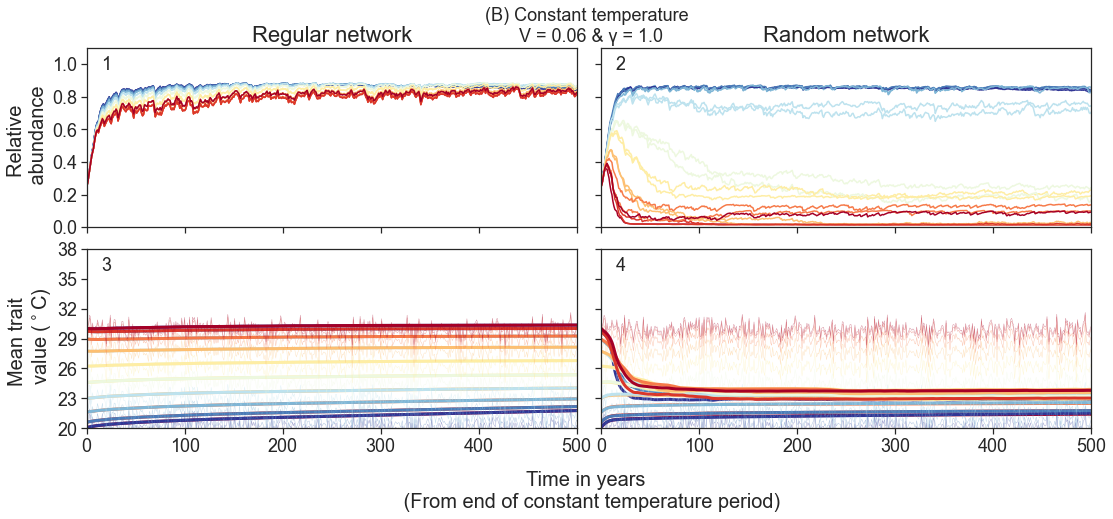

In [214]:
gamma = u"\u03B3"

length = 30
alpha_vals = np.linspace(0,1.,length)
V_vals = np.linspace(0,0.2,length)

alpha = 0
V = 8
LW1 = 3.0
LW2 = 0.4

SST = np.load("Data/Regular/SST/SST_mat_self_rec0_0.npy")
N = np.load("Data/Regular/time_series/N_reg_ave_ts_0.npy")
Z = np.load("Data/Regular/time_series/Z_reg_ave_ts_0.npy")

N_std = np.load("Data/Regular/time_series/N_reg_std_ts_0.npy")
Z_std = np.load("Data/Regular/time_series/N_reg_std_ts_0.npy")
alpha_val = 0.3

tol = 1e-3

cmap = discrete_cmap(10, base_cmap="RdYlBu")
color_idx = np.linspace(0, 1, 10)

fig, ax = plt.subplots(2,2, figsize=(18,7))
ax_big = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
ax_big.set_xlabel('Time in years \n (From end of constant temperature period)', fontsize=20, labelpad=15)

numSteps = 500

coral = 0
for i, idx in zip(np.arange(0,10), color_idx):
    ax[0,0].plot(N[i,coral,:,V,alpha], color=cmap(idx))
    
cmap = discrete_cmap(10, base_cmap="RdYlBu_r")
for i, idx in zip(np.arange(10,20), color_idx):
    ax[0,0].plot(N[i,coral,:,V,alpha], color=cmap(idx))

ax[0,0].set_xticklabels([])
    
for i, idx in zip(np.arange(0,10), color_idx):
    ax[1,0].plot(Z[i,coral,:,V,alpha], color=cmap(idx), linewidth=LW1)

cmap = discrete_cmap(10, base_cmap="RdYlBu_r")
for i, idx in zip(np.arange(10,20), color_idx):
    ax[1,0].plot(SST[i,:,V,alpha], color=cmap(idx), linewidth = LW2, alpha=0.5)
    ax[1,0].plot(Z[i,coral,:,V,alpha], color=cmap(idx), linewidth=LW1)
    
N = np.load("Data/Random/time_series/N_rand_ave_ts_0.npy")
Z = np.load("Data/Random/time_series/Z_rand_ave_ts_0.npy")

N_std = np.load("Data/Random/time_series/N_rand_std_ts_0.npy")
Z_std = np.load("Data/Random/time_series/N_rand_std_ts_0.npy")
alpha_val = 0.3

tol = 1e-3

cmap = discrete_cmap(10, base_cmap="RdYlBu")
color_idx = np.linspace(0, 1, 10)

numSteps = 500

coral = 0
for i, idx in zip(np.arange(0,10), color_idx):
    ax[0,1].plot(N[i,coral,:,V,alpha], color=cmap(idx))

cmap = discrete_cmap(10, base_cmap="RdYlBu_r")
for i, idx in zip(np.arange(10,20), color_idx):
    ax[0,1].plot(N[i,coral,:,V,alpha], color=cmap(idx))

ax[0,1].set_yticklabels([])
ax[0,1].set_xticklabels([])
ax[1,1].set_yticklabels([])
ax[0,0].set_ylabel('Relative \n abundance', fontsize=20)
ax[1,0].set_ylabel('Mean trait \n value ($^\circ$C)', fontsize=20)
ax[0,0].set_title('Regular network', fontsize=22)
ax[0,1].set_title('Random network', fontsize=22)
    
for i, idx in zip(np.arange(0,10), color_idx):
    ax[1,1].plot(Z[i,coral,:,V,alpha], color=cmap(idx), linewidth=LW1)

cmap = discrete_cmap(10, base_cmap="RdYlBu_r")
for i, idx in zip(np.arange(10,20), color_idx):
    ax[1,1].plot(SST[i,:,V,alpha], color=cmap(idx), linewidth = LW2, alpha=0.5)
    ax[1,1].plot(Z[i,coral,:,V,alpha], color=cmap(idx), linewidth=LW1)

        
ax[0,0].set_ylim([0,1.1])
ax[0,1].set_ylim([0,1.1])

ax[0,0].set_yticks(np.linspace(0,1,6))
ax[0,1].set_yticks(np.linspace(0,1,6))

ax[0,0].set_xlim([0,500])
ax[0,1].set_xlim([0,500])

ax[1,0].set_ylim([20,38])
ax[1,1].set_ylim([20,38])

ax[1,0].set_yticks(np.linspace(20,38,7))

ax[1,1].set_yticks(np.linspace(20,38,7))

ax[1,0].set_xlim([0,500])
ax[1,1].set_xlim([0,500])

ax[0,0].annotate("1", xy=(0.03, 0.88), fontsize=18, xycoords="axes fraction")
ax[0,1].annotate("2", xy=(0.03, 0.88), fontsize=18, xycoords="axes fraction")
ax[1,0].annotate("3", xy=(0.03, 0.88), fontsize=18, xycoords="axes fraction")
ax[1,1].annotate("4", xy=(0.03, 0.88), fontsize=18, xycoords="axes fraction")

plt.subplots_adjust(wspace=0.05, hspace=0.12)
(plt.title("(B) Constant temperature \n V = " + str(np.round(V_vals[V],decimals=2)) + " & " + gamma + " = "  + 
          str(np.round(1-alpha_vals[alpha],decimals=2)), fontsize=18))

plt.savefig("Figures/FigS2b.png", dpi=600, bbox_inches='tight')

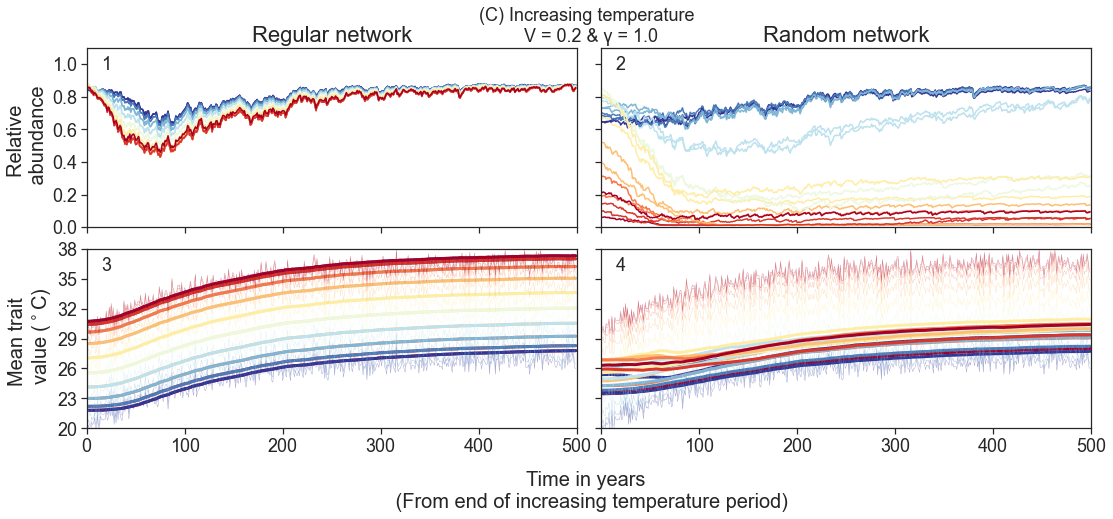

In [212]:
gamma = u"\u03B3"

length = 30
alpha_vals = np.linspace(0,1.,length)
V_vals = np.linspace(0,0.2,length)

alpha = 0
V = 29
LW1 = 3.0
LW2 = 0.4

SST = np.load("Data/Regular/SST/SST_mat_self_rec_0.npy")
N = np.load("Data/Regular/time_series/N_reg_ave_ts_1.npy")
Z = np.load("Data/Regular/time_series/Z_reg_ave_ts_1.npy")

N_std = np.load("Data/Regular/time_series/N_reg_std_ts_1.npy")
Z_std = np.load("Data/Regular/time_series/N_reg_std_ts_1.npy")
alpha_val = 0.3

tol = 1e-3

cmap = discrete_cmap(10, base_cmap="RdYlBu")
color_idx = np.linspace(0, 1, 10)

fig, ax = plt.subplots(2,2, figsize=(18,7))
ax_big = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
ax_big.set_xlabel('Time in years \n (From end of increasing temperature period)', fontsize=20, labelpad=15)

numSteps = 500

coral = 0
for i, idx in zip(np.arange(0,10), color_idx):
    ax[0,0].plot(N[i,coral,:,V,alpha], color=cmap(idx))
    
cmap = discrete_cmap(10, base_cmap="RdYlBu_r")
for i, idx in zip(np.arange(10,20), color_idx):
    ax[0,0].plot(N[i,coral,:,V,alpha], color=cmap(idx))

ax[0,0].set_xticklabels([])
    
for i, idx in zip(np.arange(0,10), color_idx):
    ax[1,0].plot(Z[i,coral,:,V,alpha], color=cmap(idx), linewidth=LW1)

cmap = discrete_cmap(10, base_cmap="RdYlBu_r")
for i, idx in zip(np.arange(10,20), color_idx):
    ax[1,0].plot(SST[i,:,V,alpha], color=cmap(idx), linewidth = LW2, alpha=0.5)
    ax[1,0].plot(Z[i,coral,:,V,alpha], color=cmap(idx), linewidth=LW1)
    
N = np.load("Data/Random/time_series/N_rand_ave_ts_1.npy")
Z = np.load("Data/Random/time_series/Z_rand_ave_ts_1.npy")

N_std = np.load("Data/Random/time_series/N_rand_std_ts_1.npy")
Z_std = np.load("Data/Random/time_series/N_rand_std_ts_1.npy")
alpha_val = 0.3

tol = 1e-3

cmap = discrete_cmap(10, base_cmap="RdYlBu")
color_idx = np.linspace(0, 1, 10)

numSteps = 500

coral = 0
for i, idx in zip(np.arange(0,10), color_idx):
    ax[0,1].plot(N[i,coral,:,V,alpha], color=cmap(idx))

cmap = discrete_cmap(10, base_cmap="RdYlBu_r")
for i, idx in zip(np.arange(10,20), color_idx):
    ax[0,1].plot(N[i,coral,:,V,alpha], color=cmap(idx))

ax[0,1].set_yticklabels([])
ax[0,1].set_xticklabels([])
ax[1,1].set_yticklabels([])
ax[0,0].set_ylabel('Relative \n abundance', fontsize=20)
ax[1,0].set_ylabel('Mean trait \n value ($^\circ$C)', fontsize=20)
ax[0,0].set_title('Regular network', fontsize=22)
ax[0,1].set_title('Random network', fontsize=22)
    
for i, idx in zip(np.arange(0,10), color_idx):
    ax[1,1].plot(Z[i,coral,:,V,alpha], color=cmap(idx), linewidth=LW1)

cmap = discrete_cmap(10, base_cmap="RdYlBu_r")
for i, idx in zip(np.arange(10,20), color_idx):
    ax[1,1].plot(SST[i,:,V,alpha], color=cmap(idx), linewidth = LW2, alpha=0.5)
    ax[1,1].plot(Z[i,coral,:,V,alpha], color=cmap(idx), linewidth=LW1)

        
ax[0,0].set_ylim([0,1.1])
ax[0,1].set_ylim([0,1.1])

ax[0,0].set_yticks(np.linspace(0,1,6))
ax[0,1].set_yticks(np.linspace(0,1,6))

ax[0,0].set_xlim([0,500])
ax[0,1].set_xlim([0,500])

ax[1,0].set_ylim([20,38])
ax[1,1].set_ylim([20,38])

ax[1,0].set_yticks(np.linspace(20,38,7))

ax[1,1].set_yticks(np.linspace(20,38,7))

ax[1,0].set_xlim([0,500])
ax[1,1].set_xlim([0,500])

ax[0,0].annotate("1", xy=(0.03, 0.88), fontsize=18, xycoords="axes fraction")
ax[0,1].annotate("2", xy=(0.03, 0.88), fontsize=18, xycoords="axes fraction")
ax[1,0].annotate("3", xy=(0.03, 0.88), fontsize=18, xycoords="axes fraction")
ax[1,1].annotate("4", xy=(0.03, 0.88), fontsize=18, xycoords="axes fraction")

plt.subplots_adjust(wspace=0.05, hspace=0.12)
(plt.title("(C) Increasing temperature \n V = " + str(np.round(V_vals[V],decimals=2)) + " & " + gamma + " = "  + 
          str(np.round(1-alpha_vals[alpha],decimals=2)), fontsize=18))

plt.savefig("Figures/FigS2c.png", dpi=600, bbox_inches='tight')

### SI - Figure S3

Figures A-F were values at the end of the constant temperature period while G-L were values at the end of the increasing temperature period.

#### Load data

In [215]:
N_0_reg_all = np.load("Data/Regular/time_series/N_reg_ave_ts_0.npy")
N_1_reg_all = np.load("Data/Regular/time_series/N_reg_ave_ts_1.npy")
N_0_rand_all = np.load("Data/Random/time_series/N_rand_ave_ts_0.npy")
N_1_rand_all = np.load("Data/Random/time_series/N_rand_ave_ts_1.npy")

#### Assign categories for Pandas dataframe and classify patches as hot, cold and intermediate

In [218]:
category3 =['cold']*4 + ['intermediate']*4 + ['hot']*4 + ['cold']*4 + ['intermediate']*4 + ['hot']*4
patches2 = np.array([5,14,4,15]) # intermediate patches
patches3 = np.array([0,19,1,18]) # hot patches
patches1 = np.array([9,10,11,12]) # cold patches

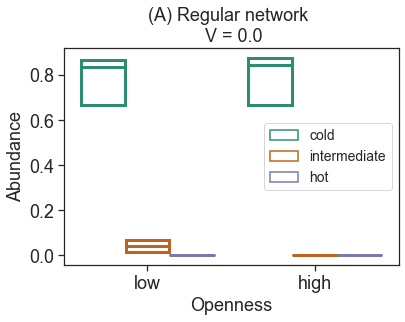

In [220]:
N = N_0_reg_all 

V = 0
alpha1 = 25
alpha2 = 0

abundance = np.concatenate((N[patches1,0,-1,V,alpha1],N[patches2,0,-1,V,alpha1],N[patches3,0,-1,V,alpha1],
                           N[patches1,0,-1,V,alpha2],N[patches2,0,-1,V,alpha2],N[patches3,0,-1,V,alpha2],
                           ))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),12),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),12)))

zipped = zip(abundance,vals,category3)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'patch']) 

fig,(ax1) = plt.subplots(1)

sns.boxplot(x='Openness', y='Abundance', hue='patch',data=df, showfliers=False, palette="Dark2", linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(A) Regular network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)

ax1.legend(loc="best",fontsize=14)

# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

plt.savefig("Figures/FigS3a.png", dpi=600, bbox_inches='tight')

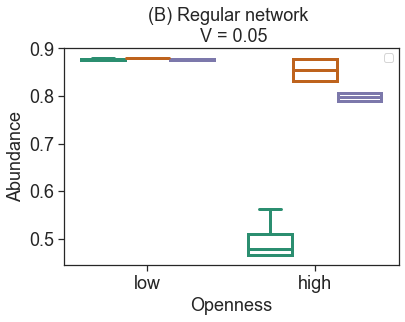

In [223]:
N = N_0_reg_all 

V = 7
alpha1 = 25
alpha2 = 0

abundance = np.concatenate((N[patches1,0,-1,V,alpha1],N[patches2,0,-1,V,alpha1],N[patches3,0,-1,V,alpha1],
                           N[patches1,0,-1,V,alpha2],N[patches2,0,-1,V,alpha2],N[patches3,0,-1,V,alpha2],
                           ))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),12),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),12)))

zipped = zip(abundance,vals,category3)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'patch']) 

fig,(ax1) = plt.subplots(1)

sns.boxplot(x='Openness', y='Abundance', hue='patch',data=df, showfliers=False, palette="Dark2", linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(B) Regular network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)

ax1.legend([])

# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

plt.savefig("Figures/FigS3b.png", dpi=600, bbox_inches='tight')

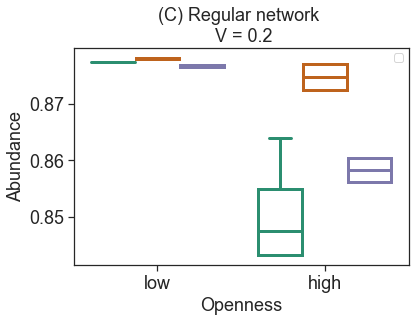

In [224]:
N = N_0_reg_all 

V = 29
alpha1 = 25
alpha2 = 0

abundance = np.concatenate((N[patches1,0,-1,V,alpha1],N[patches2,0,-1,V,alpha1],N[patches3,0,-1,V,alpha1],
                           N[patches1,0,-1,V,alpha2],N[patches2,0,-1,V,alpha2],N[patches3,0,-1,V,alpha2],
                           ))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),12),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),12)))

zipped = zip(abundance,vals,category3)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'patch']) 

fig,(ax1) = plt.subplots(1)

sns.boxplot(x='Openness', y='Abundance', hue='patch',data=df, showfliers=False, palette="Dark2", linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(C) Regular network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)

ax1.legend([])

# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

plt.savefig("Figures/FigS3c.png", dpi=600, bbox_inches='tight')

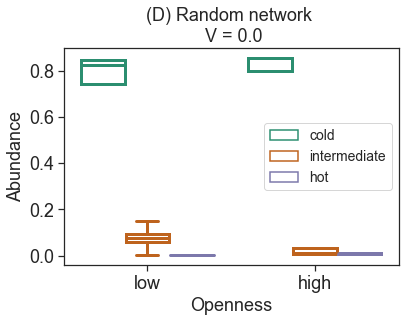

In [227]:
N = N_0_rand_all 

V = 0
alpha1 = 25
alpha2 = 0

abundance = np.concatenate((N[patches1,0,-1,V,alpha1],N[patches2,0,-1,V,alpha1],N[patches3,0,-1,V,alpha1],
                           N[patches1,0,-1,V,alpha2],N[patches2,0,-1,V,alpha2],N[patches3,0,-1,V,alpha2],
                           ))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),12),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),12)))

zipped = zip(abundance,vals,category3)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'patch']) 

fig,(ax1) = plt.subplots(1)

sns.boxplot(x='Openness', y='Abundance', hue='patch',data=df, showfliers=False, palette="Dark2", linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(D) Random network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)

ax1.legend(loc="best",fontsize=14)


# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

plt.savefig("Figures/FigS3d.png", dpi=600, bbox_inches='tight')

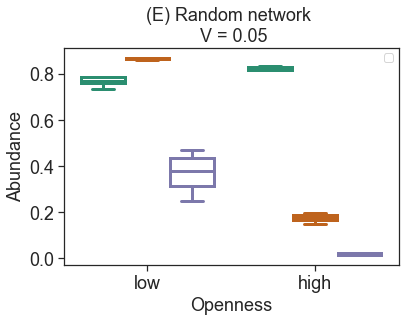

In [229]:
N = N_0_rand_all 

V = 7
alpha1 = 25
alpha2 = 0

abundance = np.concatenate((N[patches1,0,-1,V,alpha1],N[patches2,0,-1,V,alpha1],N[patches3,0,-1,V,alpha1],
                           N[patches1,0,-1,V,alpha2],N[patches2,0,-1,V,alpha2],N[patches3,0,-1,V,alpha2],
                           ))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),12),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),12)))

zipped = zip(abundance,vals,category3)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'patch']) 

fig,(ax1) = plt.subplots(1)

sns.boxplot(x='Openness', y='Abundance', hue='patch',data=df, showfliers=False, palette="Dark2", linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(E) Random network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)

ax1.legend([])


# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

plt.savefig("Figures/FigS3e.png", dpi=600, bbox_inches='tight')

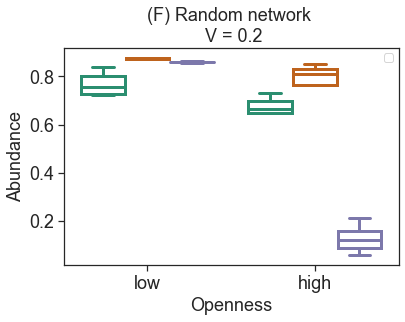

In [230]:
N = N_0_rand_all 

V = 29
alpha1 = 25
alpha2 = 0

abundance = np.concatenate((N[patches1,0,-1,V,alpha1],N[patches2,0,-1,V,alpha1],N[patches3,0,-1,V,alpha1],
                           N[patches1,0,-1,V,alpha2],N[patches2,0,-1,V,alpha2],N[patches3,0,-1,V,alpha2],
                           ))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),12),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),12)))

zipped = zip(abundance,vals,category3)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'patch']) 

fig,(ax1) = plt.subplots(1)

sns.boxplot(x='Openness', y='Abundance', hue='patch',data=df, showfliers=False, palette="Dark2", linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(F) Random network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)

ax1.legend([])


# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

plt.savefig("Figures/FigS3f.png", dpi=600, bbox_inches='tight')

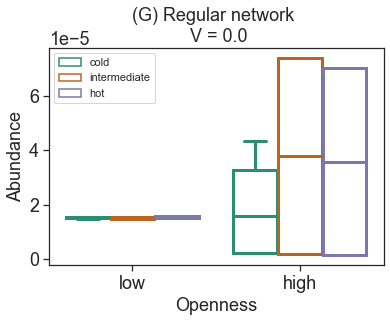

In [231]:
N = N_1_reg_all 

V = 0
alpha1 = 25
alpha2 = 0

abundance = np.concatenate((N[patches1,0,-1,V,alpha1],N[patches2,0,-1,V,alpha1],N[patches3,0,-1,V,alpha1],
                           N[patches1,0,-1,V,alpha2],N[patches2,0,-1,V,alpha2],N[patches3,0,-1,V,alpha2],
                           ))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),12),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),12)))

zipped = zip(abundance,vals,category3)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'patch']) 

fig,(ax1) = plt.subplots(1)

sns.boxplot(x='Openness', y='Abundance', hue='patch',data=df, showfliers=False, palette="Dark2", linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(G) Regular network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)

ax1.legend(loc='best')


# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

plt.savefig("Figures/FigS3g.png", dpi=600, bbox_inches='tight')

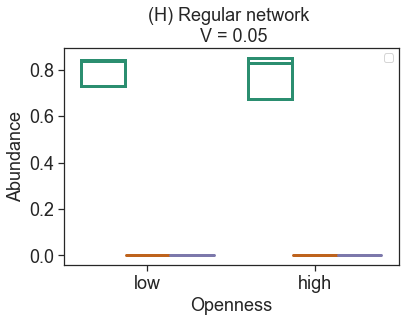

In [237]:
N = N_1_reg_all 

V = 7
alpha1 = 25
alpha2 = 0

abundance = np.concatenate((N[patches1,0,-1,V,alpha1],N[patches2,0,-1,V,alpha1],N[patches3,0,-1,V,alpha1],
                           N[patches1,0,-1,V,alpha2],N[patches2,0,-1,V,alpha2],N[patches3,0,-1,V,alpha2],
                           ))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),12),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),12)))

zipped = zip(abundance,vals,category3)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'patch']) 

fig,(ax1) = plt.subplots(1)

sns.boxplot(x='Openness', y='Abundance', hue='patch',data=df, showfliers=False, palette="Dark2", linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(H) Regular network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)

ax1.legend([])


# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

plt.savefig("Figures/FigS3h.png", dpi=600, bbox_inches='tight')

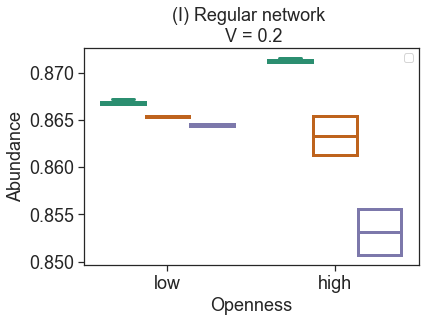

In [235]:
N = N_1_reg_all 

V = 29
alpha1 = 25
alpha2 = 0

abundance = np.concatenate((N[patches1,0,-1,V,alpha1],N[patches2,0,-1,V,alpha1],N[patches3,0,-1,V,alpha1],
                           N[patches1,0,-1,V,alpha2],N[patches2,0,-1,V,alpha2],N[patches3,0,-1,V,alpha2],
                           ))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),12),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),12)))

zipped = zip(abundance,vals,category3)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'patch']) 

fig,(ax1) = plt.subplots(1)

sns.boxplot(x='Openness', y='Abundance', hue='patch',data=df, showfliers=False, palette="Dark2", linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(I) Regular network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)

ax1.legend([])


# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

plt.savefig("Figures/FigS3i.png", dpi=600, bbox_inches='tight')

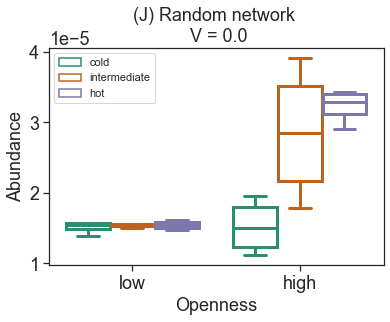

In [239]:
N = N_1_rand_all 

V = 0
alpha1 = 25
alpha2 = 0

abundance = np.concatenate((N[patches1,0,-1,V,alpha1],N[patches2,0,-1,V,alpha1],N[patches3,0,-1,V,alpha1],
                           N[patches1,0,-1,V,alpha2],N[patches2,0,-1,V,alpha2],N[patches3,0,-1,V,alpha2],
                           ))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),12),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),12)))

zipped = zip(abundance,vals,category3)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'patch']) 

fig,(ax1) = plt.subplots(1)

sns.boxplot(x='Openness', y='Abundance', hue='patch',data=df, showfliers=False, palette="Dark2", linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(J) Random network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)

ax1.legend(loc='best')


# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

plt.savefig("Figures/FigS3j.png", dpi=600, bbox_inches='tight')

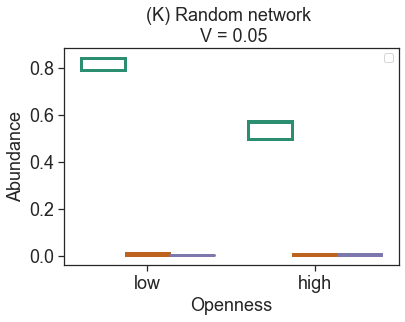

In [240]:
N = N_1_rand_all 

V = 7
alpha1 = 25
alpha2 = 0

abundance = np.concatenate((N[patches1,0,-1,V,alpha1],N[patches2,0,-1,V,alpha1],N[patches3,0,-1,V,alpha1],
                           N[patches1,0,-1,V,alpha2],N[patches2,0,-1,V,alpha2],N[patches3,0,-1,V,alpha2],
                           ))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),12),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),12)))

zipped = zip(abundance,vals,category3)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'patch']) 

fig,(ax1) = plt.subplots(1)

sns.boxplot(x='Openness', y='Abundance', hue='patch',data=df, showfliers=False, palette="Dark2", linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(K) Random network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)

ax1.legend([])


# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

plt.savefig("Figures/FigS3k.png", dpi=600, bbox_inches='tight')

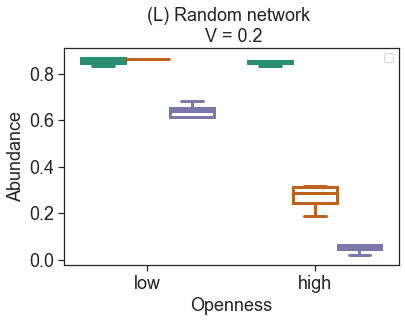

In [241]:
N = N_1_rand_all 

V = 29
alpha1 = 25
alpha2 = 0

abundance = np.concatenate((N[patches1,0,-1,V,alpha1],N[patches2,0,-1,V,alpha1],N[patches3,0,-1,V,alpha1],
                           N[patches1,0,-1,V,alpha2],N[patches2,0,-1,V,alpha2],N[patches3,0,-1,V,alpha2],
                           ))

vals = np.concatenate((np.repeat(np.round(1-gamma_vals[alpha1],decimals=2),12),
                       np.repeat(np.round(1-gamma_vals[alpha2],decimals=2),12)))

zipped = zip(abundance,vals,category3)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Openness', 'patch']) 

fig,(ax1) = plt.subplots(1)

sns.boxplot(x='Openness', y='Abundance', hue='patch',data=df, showfliers=False, palette="Dark2", linewidth=3, ax=ax1)

for i,artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax1.set_title("(L) Random network \n V = " + str(np.round(V_vals[V],decimals=2)), fontsize=18)
ax1.set_xlabel("Openness",fontsize=18)
ax1.set_xticklabels(['low','high'],fontsize=18)
ax1.set_ylabel("Abundance",fontsize=18)

ax1.legend([])


# Also fix the legend
for legpatch in ax1.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

plt.savefig("Figures/FigS3l.png", dpi=600, bbox_inches='tight')